# Programation d'un Neurone Artificiel

Je vais programmer un neurone artificiel qui sera capable de diviser un dataset en minimisant le taux d'erreur

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

dimension de X : (100, 2)
dimension de y : (100, 1)


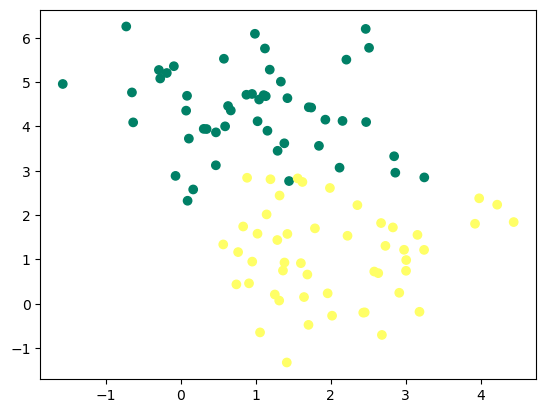

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimension de X :', X.shape)
print('dimension de y :', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.show()

## Création des fonction composant notre neurone

Je viens de traduire toute les fonction mathèmatique de la dèscente de gradiant en fonction informatique pour l'implèmenter dans notre neurone artificielle 

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A, y):
    return - (1 / len(y) * np.sum(y *np.log(A) + (1 - y) * np.log(1 - A)))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 /len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

###  Création d'une fonction prédicte

Je vais crée une fonction qui nous permettra d'utiliser le model et de faire notre prèdiction

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A) #probabilité
    return A >= 0.5

## Création de notre Neurone

Je vais crée notre neurone en utilisant toute les fonctions que j'ai cré plustôt

In [9]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 1000):
    #initialisation des paramètre W, b
    W, b = initialisation(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    # Verification de la précision de notre model    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    #Affichage de la courbe d'apprentissage de notre model
    plt.plot(Loss)
    plt.show()
    
    return (W, b) #Sauvegarde des paramètre du model entrainé

[[9.68353881e-01]
 [9.68675230e-01]
 [1.20234148e-03]
 [2.66004306e-01]
 [9.87683325e-01]
 [3.83051450e-01]
 [2.88254765e-02]
 [9.47579641e-01]
 [2.31587369e-02]
 [9.86255012e-01]
 [1.00746947e-02]
 [9.79197012e-01]
 [3.68960710e-03]
 [6.94044320e-03]
 [8.74654162e-01]
 [9.87939439e-01]
 [9.99107406e-01]
 [1.93461860e-02]
 [9.64549622e-01]
 [8.73598970e-01]
 [1.10191384e-02]
 [1.26614032e-02]
 [5.06179441e-01]
 [1.03726234e-03]
 [9.90453977e-01]
 [7.95246981e-03]
 [9.90031849e-01]
 [6.31618923e-04]
 [1.60992320e-02]
 [8.19788613e-01]
 [9.98136615e-01]
 [1.16345252e-02]
 [9.26157348e-01]
 [9.98151375e-01]
 [4.37135028e-01]
 [8.61641513e-02]
 [9.53133165e-01]
 [5.95974071e-01]
 [4.10123818e-01]
 [7.99204595e-01]
 [9.40893527e-02]
 [5.57910064e-03]
 [7.80651616e-05]
 [1.00887881e-01]
 [2.31987974e-01]
 [9.37912883e-01]
 [9.97495137e-01]
 [9.97675258e-01]
 [1.49551851e-03]
 [1.22339306e-03]
 [9.92971625e-01]
 [8.72053087e-01]
 [2.34439385e-03]
 [7.21948479e-03]
 [7.73456548e-01]
 [1.023115

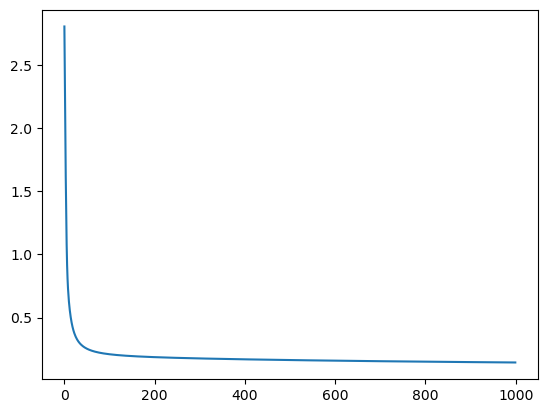

In [10]:
W, b = artificial_neuron(X, y)

## Prediction de notre modèle entrainer

maintenant que le model est entrainè je vais l'utiliser pour prédire si une novelle plante que j'ai ajoutè est toxique ou non, en tout cas la probabilité qu'elle soit toxique

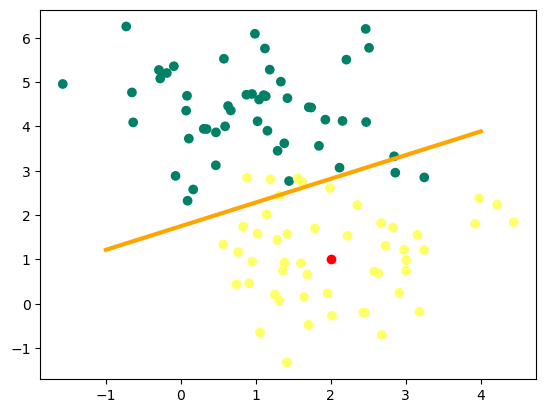

[0.97112263]


array([ True])

In [11]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 -b) / W[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c='r', cmap="summer")
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

#prédiction de la machine
predict(new_plant, W, b)

d'après la machine cette plante est dans la catégorie 1 donc cette plante est toxique ile ne faut pas la consommer
___
On peut voir aussi que la probabilité est de 85% de chance qu'elle soit toxique

___
On peut aussi voire la frontière de discision du modèle et ses erreur

# Visualisation 3D

Je vais reprèsenté la division de notre model en 3D pour un meilleur aperçu des paramêtre

In [12]:
import plotly.graph_objects as go

In [28]:
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0].flatten(), 
    y=X[:, 1].flatten(), 
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.8,
        reversescale=True
    )
)])

In [34]:
fig.update_layout(template='plotly_dark', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
fig.show()

Voici la séparation 3D de nos plante toxique et non toxique et je vais maintenant imprimer une fonction sigmoid par dessus à l'aide des paramètre W, b générer par notre neurone

In [54]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity=0.7, reversescale=True)])


In [55]:
fig.add_scatter3d(
    x=X[:, 0].flatten(), 
    y=X[:, 1].flatten(), 
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),
        colorscale='YlGn',
        opacity=0.9,
        reversescale=True
))

fig.update_layout(template='plotly_dark', margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = 'orthographic'
fig.show()

# Génération d'une animation de la courbe d'apprentissage

Je vais générer une animation qui reprèsentera la courbe d'apprentissage de mon model 

In [56]:
from matplotlib.animation import FuncAnimation

In [86]:
def artificial_neuron2(X, y, learning_rate = 0.05, n_iter = 300):
    W, b = initialisation(X)
    
    history = []
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        history.append([W, b, Loss, i])
        
    
    plt.plot(Loss)
    plt.show()
    
    return history

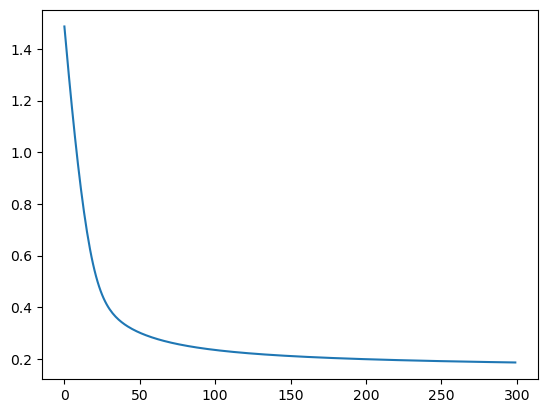

In [87]:
history = artificial_neuron2(X, y)

In [88]:
def animate(params):
    W = params[0]
    b = params[1]
    loss = params[2]
    i = params[3]
    
    ax[0].clear() # frontiere de décision
    ax[1].clear() # sigmoide
    ax[2].clear() # fonction Cout
    
    s = 300
    # frontière de décision
    ax[0].scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='summer', edgecolors='k', linewidths=3)
    
    xlim = ax[0].get_xlim()
    ylim = ax[0].get_ylim()
    
    x1 = np.linspace(-3, 6, 100)
    x2 = (- W[0] * x1 - b) / W[1]
    ax[0].plot(x1, x2, c='orange', lw=4)
    
    ax[0].set_xlim(X[:, 0].min(), X[:, 0].max())
    ax[0].set_ylim(X[:, 1].min(), X[:, 1].max())
    ax[0].set_title('Frontière de décision')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    
    # sigmoide 
    z = X.dot(W) + b
    z_new = np.linspace(z.min(), z.max(), 100)
    A = 1 / (1 + np.exp(-z_new))
    ax[1].plot(z_new, A, c='orange', lw=4)
    ax[1].scatter(z[y==0], np.zeros(z[y==0].shape), c='#008066', edgecolors='k', linewidths=3,s=s)
    ax[1].scatter(z[y==1], np.ones(z[y==1].shape), c='#ffff66', edgecolors='k', linewidths=3,s=s)
    # ax[1].vlines(x=0, ymin=1, colors='red') # Frontière de décision
    ax[1].set_xlim(z.min(), z.max())
    ax[1].set_title('sigmoide')
    ax[1].set_xlabel('Z')
    ax[1].set_ylabel('A(Z)')
    
    for j in range(len(A[y.flatten()==0])):
        ax[1].vlines(z[y==0][j], 
                     ymin=0, 
                     ymax=1 / (1 +np.exp(-z[y==0][j])), 
                     color='red', 
                     alpha=0.5, 
                     zorder=-1
                    )

    for j in range(len(A[y.flatten()==1])):
        ax[1].vlines(z[y==1][j], 
                     ymin=1, 
                     ymax=1 / (1 +np.exp(-z[y==1][j])), 
                     color='red', 
                     alpha=0.5, 
                     zorder=-1
                    )

    # Fonction Coût
    ax[2].plot(range(i), loss[:i], color='red', lw=4)
    ax[2].set_xlim(loss[-1] * 0.8, len(loss))
    ax[2].set_ylim(0, loss[0] * 1.1)
    ax[2].set_title('Fonction Cout')
    ax[2].set_xlabel('iteration')
    ax[2].set_ylabel('Loss')

    

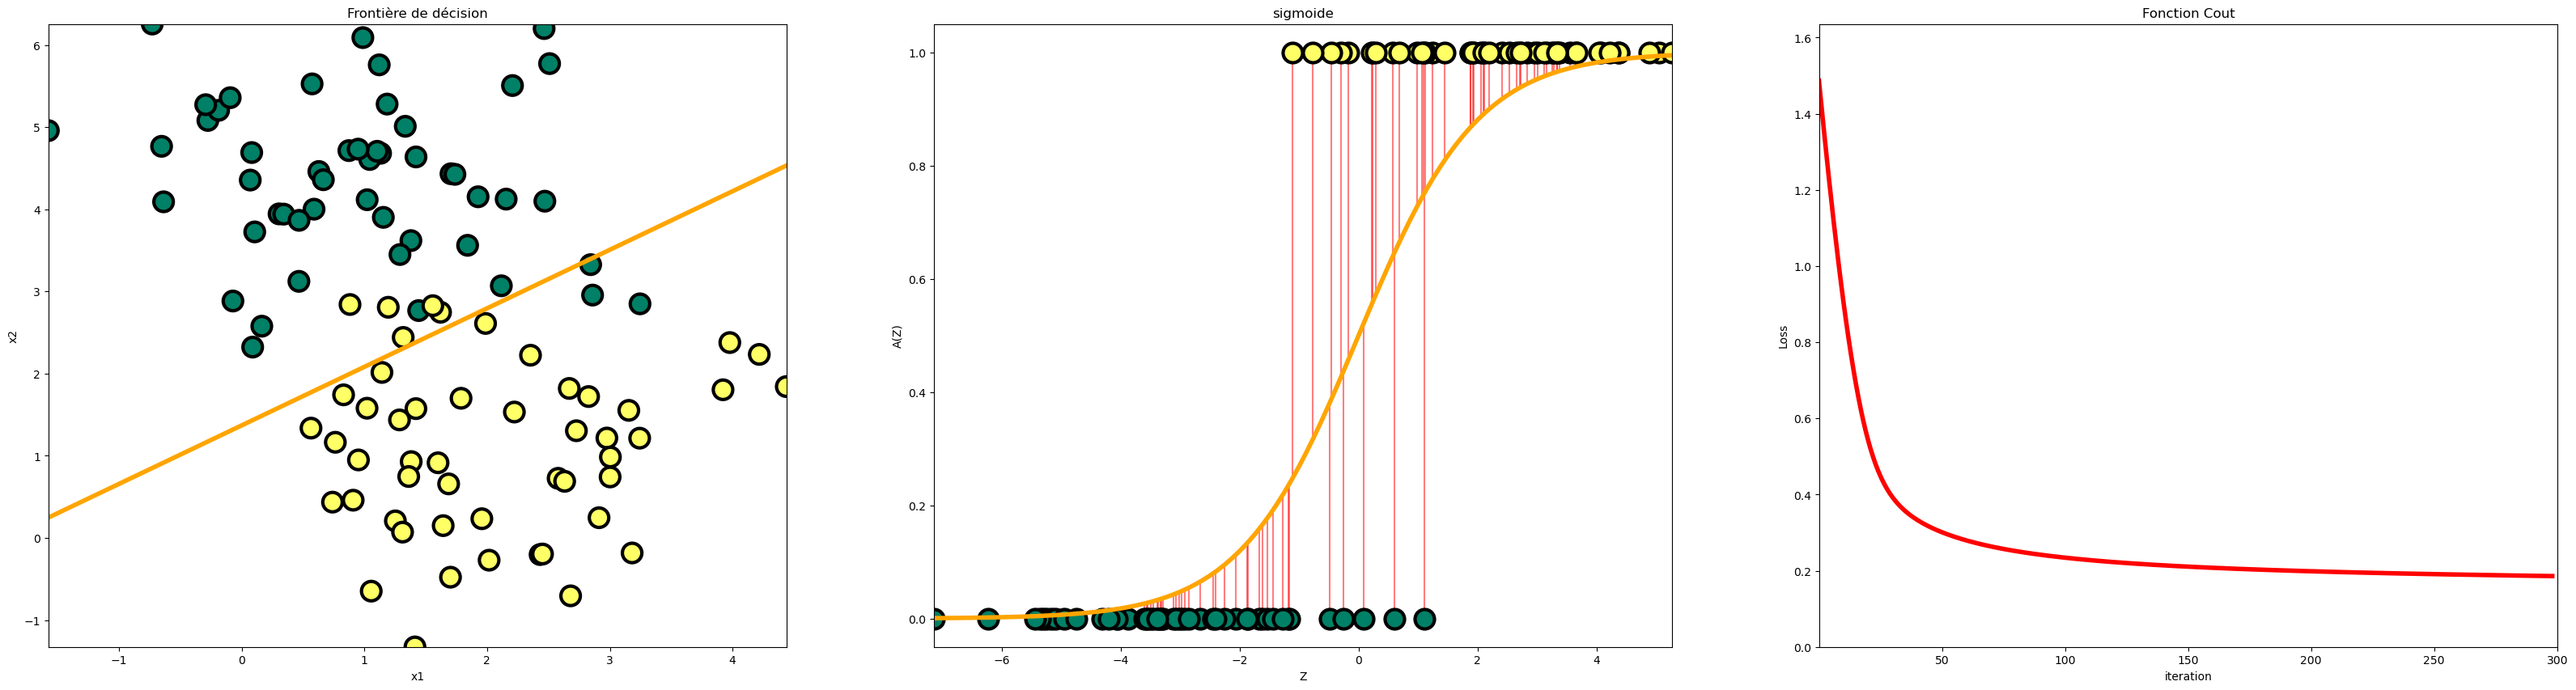

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40, 10))
ani = FuncAnimation(fig, animate, frames=history, interval=200, repeat=False)

import matplotlib.animation as animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=3200)
ani.save('animation.mp4', writer=writer)

Voilà vous pouvez regarder le résultat dans le fichier animation.mp4 qui retrace la courbe d'apprentissage du model n'hésité pas à bidouiller le learning_rate du model et sont nombre d'itération pour avoir une animation plus impréssionante ;-)